In [1]:
#70k+ Job Applicants Data : 
    #Age: age of the applicant, >35 years old or <35 years old (categorical)
    #EdLevel: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
    #Gender: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
    #MainBranch: whether the applicant is a profesional developer (categorical)
    #YearsCode: how long the applicant has been coding (integer)
    #YearsCodePro: how long the applicant has been coding in a professional context, (integer)
    #PreviousSalary: the applicant's previous job salary (float)
    #ComputerSkills: number of computer skills known by the applicant (integer)
    #Employed: target variable, whether the applicant has been hired (categorical)
    #Build module to check Whether the applicant has been hired 

In [2]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [3]:
proj=pd.read_csv("D:\stackoverflow_full.csv")
proj.head(2)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1


In [4]:
proj.shape

(73462, 15)

DROP Unique Column

In [5]:
proj=proj.drop(['Unnamed: 0'],axis=1)

# Treat Missing Values

In [6]:
proj.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

In [7]:
proj.HaveWorkedWith.value_counts()

Python                                                                                                                              71
Python;Git                                                                                                                          54
C++;Python                                                                                                                          49
C++                                                                                                                                 41
C++;Python;Git                                                                                                                      36
                                                                                                                                    ..
Bash/Shell;C#;Delphi;HTML/CSS;JavaScript;PHP;PowerShell;SQL;VBA;Git;jQuery;MariaDB;Microsoft SQL Server;Oracle;PostgreSQL;SQLite     1
SQL;Oracle;SQLite                                      

In [8]:
proj.HaveWorkedWith=proj.HaveWorkedWith.fillna('C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn;Angular;ASP.NET;jQuery;React.js;AWS;DynamoDB;Microsoft SQL Server;SQLite')

In [9]:
proj.isnull().sum()

Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
HaveWorkedWith    0
ComputerSkills    0
Employed          0
dtype: int64

# Dtype Conversion

In [10]:
proj.dtypes

Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
HaveWorkedWith     object
ComputerSkills      int64
Employed            int64
dtype: object

In [11]:
proj.Age=le.fit_transform(proj.Age)
proj.Accessibility=le.fit_transform(proj.Accessibility)
proj.EdLevel =le.fit_transform(proj.EdLevel)
proj.Gender=le.fit_transform(proj.Gender)
proj.MentalHealth=le.fit_transform(proj.MentalHealth)
proj.MainBranch=le.fit_transform(proj.MainBranch)
proj.Country=le.fit_transform(proj.Country)
proj.HaveWorkedWith=le.fit_transform(proj.HaveWorkedWith)

In [12]:
proj.dtypes

Age                 int32
Accessibility       int32
EdLevel             int32
Employment          int64
Gender              int32
MentalHealth        int32
MainBranch          int32
YearsCode           int64
YearsCodePro        int64
Country             int32
PreviousSalary    float64
HaveWorkedWith      int32
ComputerSkills      int64
Employed            int64
dtype: object

#                                         Base Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [14]:
proj.head(2)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,0,0,1,0,0,0,7,4,146,51552.0,37872,4,0
1,0,0,4,1,0,0,0,12,5,141,46482.0,17241,12,1


In [15]:
x=proj.iloc[:,0:-1]
y=proj.iloc[:,-1]

In [16]:
y.head(2)

0    0
1    1
Name: Employed, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((58769, 13), (14693, 13), (58769,), (14693,))

#              Logistic 

In [19]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [20]:
lg.fit(x_train,y_train)

LogisticRegression()

In [21]:
lg_p1=lg.predict(x_test)
lg_p1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
lg_c1=confusion_matrix(y_test,lg_p1)
lg_c1 

array([[4940, 1884],
       [1476, 6393]], dtype=int64)

In [23]:
lg_ac1=lg_c1.diagonal().sum()/lg_c1.sum()*100
lg_ac1

77.13196760362078

In [24]:
print(classification_report(y_test,lg_p1))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      6824
           1       0.77      0.81      0.79      7869

    accuracy                           0.77     14693
   macro avg       0.77      0.77      0.77     14693
weighted avg       0.77      0.77      0.77     14693



In [25]:
lg_f1=f1_score(y_test,lg_p1)
lg_pr1=precision_score(y_test,lg_p1)
lg_r1=recall_score(y_test,lg_p1)
print(lg_f1,lg_pr1,lg_r1)

0.7918989223337051 0.7723812975715839 0.8124285169653069


# DT

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
dt_p1=dt.predict(x_test)
dt_p1

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [29]:
dt_c1=confusion_matrix(y_test,dt_p1)
dt_c1

array([[5290, 1534],
       [1575, 6294]], dtype=int64)

In [30]:
dt_ac1=dt_c1.diagonal().sum()/dt_c1.sum()*100
dt_ac1

78.84026407132649

In [31]:
print(classification_report(y_test,dt_p1))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      6824
           1       0.80      0.80      0.80      7869

    accuracy                           0.79     14693
   macro avg       0.79      0.79      0.79     14693
weighted avg       0.79      0.79      0.79     14693



In [32]:
dt_f1=f1_score(y_test,dt_p1)
dt_pr1=precision_score(y_test,dt_p1)
dt_r1=recall_score(y_test,dt_p1)
print(dt_f1,dt_pr1,dt_r1)

0.801936675797923 0.8040367910066428 0.7998475028593214


# RF

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [34]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
rf_p1=rf.predict(x_test)

In [36]:
rf_c1=confusion_matrix(y_test,rf_p1)
rf_c1

array([[5469, 1355],
       [1224, 6645]], dtype=int64)

In [37]:
rf_ac1=rf_c1.diagonal().sum()/rf_c1.sum()*100
rf_ac1

82.4474239433744

In [38]:
print(classification_report(y_test,rf_p1))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6824
           1       0.83      0.84      0.84      7869

    accuracy                           0.82     14693
   macro avg       0.82      0.82      0.82     14693
weighted avg       0.82      0.82      0.82     14693



In [39]:
rf_f1=f1_score(y_test,rf_p1)
rf_pr1=precision_score(y_test,rf_p1)
rf_r1=recall_score(y_test,rf_p1)
print(rf_f1,rf_pr1,rf_r1)

0.8374818829163778 0.830625 0.8444529165078155


# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
knn_p1=knn.predict(x_test)

In [43]:
knn_c1=confusion_matrix(y_test,knn_p1)
knn_c1

array([[4413, 2411],
       [2135, 5734]], dtype=int64)

In [44]:
knn_ac1=knn_c1.diagonal().sum()/knn_c1.sum()*100
knn_ac1

69.06009664466072

In [45]:
print(classification_report(y_test,knn_p1))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      6824
           1       0.70      0.73      0.72      7869

    accuracy                           0.69     14693
   macro avg       0.69      0.69      0.69     14693
weighted avg       0.69      0.69      0.69     14693



In [46]:
knn_f1=f1_score(y_test,knn_p1)
knn_pr1=precision_score(y_test,knn_p1)
knn_r1=recall_score(y_test,knn_p1)
print(knn_f1,knn_pr1,knn_r1)

0.716123392031972 0.7039901780233272 0.7286821705426356


# XGB

In [47]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [48]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
xgb_p1=xgb.predict(x_test)
#xgb_p1

In [50]:
xgb_c1=confusion_matrix(y_test,xgb_p1)
xgb_c1

array([[5640, 1184],
       [1028, 6841]], dtype=int64)

In [51]:
xgb_ac1=xgb_c1.diagonal().sum()/xgb_c1.sum()*100
xgb_ac1

84.94521200571701

In [52]:
print(classification_report(y_test,xgb_p1))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6824
           1       0.85      0.87      0.86      7869

    accuracy                           0.85     14693
   macro avg       0.85      0.85      0.85     14693
weighted avg       0.85      0.85      0.85     14693



In [53]:
xgb_f1=f1_score(y_test,xgb_p1)
xgb_pr1=precision_score(y_test,xgb_p1)
xgb_r1=recall_score(y_test,xgb_p1)
print(xgb_f1,xgb_pr1,xgb_r1)

0.8608279854032969 0.8524610591900311 0.8693607828186555


# NB

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [55]:
nb.fit(x_train,y_train)

MultinomialNB()

In [56]:
nb_p1=nb.predict(x_test)
#nb_p1

In [57]:
nb_c1=confusion_matrix(y_test,nb_p1)
nb_c1

array([[4162, 2662],
       [3477, 4392]], dtype=int64)

In [58]:
nb_ac1=nb_c1.diagonal().sum()/nb_c1.sum()*100
nb_ac1

58.21819914244879

In [59]:
print(classification_report(y_test,nb_p1))

              precision    recall  f1-score   support

           0       0.54      0.61      0.58      6824
           1       0.62      0.56      0.59      7869

    accuracy                           0.58     14693
   macro avg       0.58      0.58      0.58     14693
weighted avg       0.59      0.58      0.58     14693



In [60]:
nb_f1=f1_score(y_test,nb_p1)
nb_pr1=precision_score(y_test,nb_p1)
nb_r1=recall_score(y_test,nb_p1)
print(nb_f1,nb_pr1,nb_r1)

0.5886215908329423 0.6226254607314998 0.5581395348837209


# SVM

In [61]:
from sklearn.svm import SVC
svm=SVC()

In [62]:
svm.fit(x_train,y_train)

SVC()

In [63]:
svm_p1=svm.predict(x_test)

In [64]:
svm_cf1=confusion_matrix(y_test,svm_p1)
svm_cf1

array([[3574, 3250],
       [1804, 6065]], dtype=int64)

In [65]:
svm_ac1=svm_cf1.diagonal().sum()/svm_cf1.sum()*100
svm_ac1

65.60266793711291

In [66]:
print(classification_report(y_test,svm_p1))

              precision    recall  f1-score   support

           0       0.66      0.52      0.59      6824
           1       0.65      0.77      0.71      7869

    accuracy                           0.66     14693
   macro avg       0.66      0.65      0.65     14693
weighted avg       0.66      0.66      0.65     14693



In [67]:
svm_f1=f1_score(y_test,svm_p1)
svm_pr1=precision_score(y_test,svm_p1)
svm_r1=recall_score(y_test,svm_p1)
print(svm_f1,svm_pr1,svm_r1)

0.7058891992551211 0.6511003757380569 0.7707459651798195


In [68]:
L1=["Logistic","DT","Rf","XGB","NB","SVM"]
L2=[lg_ac1,dt_ac1,rf_ac1,xgb_ac1,nb_ac1,svm_ac1]
L3=[lg_pr1,dt_pr1,rf_pr1,xgb_pr1,nb_pr1,svm_pr1]
L4=[lg_r1,dt_r1,rf_r1,xgb_r1,nb_r1,svm_r1]
L5=[lg_f1,dt_f1,rf_f1,xgb_f1,nb_f1,svm_f1]

In [69]:
df1=pd.DataFrame({"Model":L1,"Accuracy":L2,"Precision":L3,"Recall":L4,"f1_score":L5})
df1

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,77.131968,0.772381,0.812429,0.791899
1,DT,78.840264,0.804037,0.799848,0.801937
2,Rf,82.447424,0.830625,0.844453,0.837482
3,XGB,84.945212,0.852461,0.869361,0.860828
4,NB,58.218199,0.622625,0.558140,0.588622
5,SVM,65.602668,0.651100,0.770746,0.705889


# Class Imbalance:

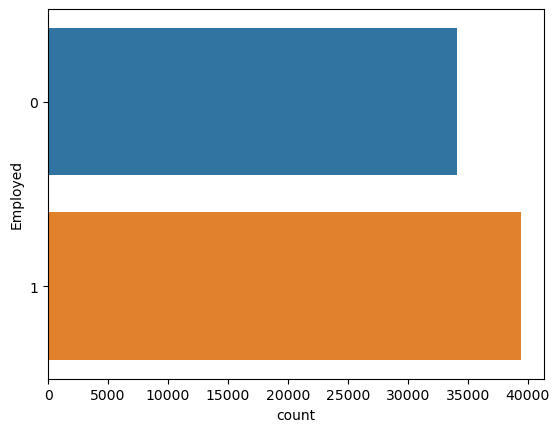

In [70]:
sns.countplot(data=proj,y='Employed')
plt.show()

# UnderSampling

In [71]:
proj.Employed.value_counts()

1    39392
0    34070
Name: Employed, dtype: int64

In [72]:
#c_0,c_1=proj["Employed"].value_counts()
#c_0,c_1 #count of 0 and 1 class

In [73]:
#train_0=proj[proj["Employed"]==0]
#train_1=proj[proj["Employed"]==1]
#train_0.shape,train_1.shape

In [74]:
#train_0.head(2) #select the class which has more data

In [75]:
#class_1under=train_1.sample(c_1) #store the class which has less data as a sample

In [76]:
#class_1under.shape,train_0.shape

In [77]:
#proj1=pd.concat([class_1under,train_0],axis=0) #concat to create df which has same number of sample
#proj1.shape

In [78]:
#proj1.Employed.value_counts()

In [79]:
#x1=proj1.iloc[:,:-1]
#y1=proj1.iloc[:,-1]

In [80]:
#x1.head(1)

# Imblearn

In [81]:
#import imblearn 
#from imblearn.under_sampling import RandomUnderSampler

In [82]:
#d_x=proj.iloc[:,:-1]
#d_y=proj.iloc[:,-1]

In [83]:
#a1=RandomUnderSampler(sampling_strategy="all")

In [84]:
#d_x.shape,d_y.shape

In [85]:
#x1,y1=a1.fit_resample(d_x,d_y)
#x1.shape,y1.shape

# NearMiss

In [86]:
#from imblearn.under_sampling import NearMiss
#nm=NearMiss()

In [87]:
#hr_x=proj.iloc[:,:-1]
#hr_y=proj.iloc[:,-1]

In [88]:
#hr_y.value_counts()

In [89]:
#x1,y1=nm.fit_resample(hr_x,hr_y)

In [90]:
#x1.shape,y1.shape

# OverSampling

In [91]:
c_0,c_1=proj["Employed"].value_counts()
c_0,c_1 

(39392, 34070)

In [92]:
train_0=proj[proj["Employed"]==0]
train_1=proj[proj["Employed"]==1]
train_0.shape,train_1.shape

((34070, 14), (39392, 14))

In [93]:
class_over=train_0.sample(c_0,replace=True)

In [94]:
class_over.shape,train_1.shape

((39392, 14), (39392, 14))

In [95]:
proj1=pd.concat([class_over,train_1],axis=0)
proj1.shape

(78784, 14)

In [96]:
proj1.Employed.value_counts()

0    39392
1    39392
Name: Employed, dtype: int64

In [97]:
x1=proj1.iloc[:,:-1]
y1=proj1.iloc[:,-1]

In [98]:
x1.shape,y1.shape

((78784, 13), (78784,))

In [99]:
y1.head(1)

42778    0
Name: Employed, dtype: int64

# Imblearn

In [100]:
#from imblearn.over_sampling import RandomOverSampler

In [101]:
#x3=proj.iloc[:,:-1]
#y3=proj.iloc[:,-1]

In [102]:
#a2=RandomOverSampler(random_state=42)
#x1,y1=a2.fit_resample(x3,y3)

In [103]:
#x1.shape,y1.shape

# SMOTE

In [104]:
#hr_x=proj.iloc[:,:-1]
#hr_y=proj.iloc[:,-1]

In [105]:
#hr_y.value_counts()

In [106]:
#from imblearn.over_sampling import SMOTE

In [107]:
#smote=SMOTE()

In [108]:
#x1,y1=smote.fit_resample(hr_x,hr_y)

In [109]:
#x1.shape,y1.shape

In [110]:
#y1.value_counts()

In [111]:
x_tr,x_te,y_tr,y_te=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [112]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((63027, 13), (15757, 13), (63027,), (15757,))

In [113]:
proj1.skew()

Age               0.622523
Accessibility     5.613363
EdLevel          -0.472966
Employment       -2.407853
Gender            3.780996
MentalHealth      1.320219
MainBranch        2.985517
YearsCode         1.152637
YearsCodePro      1.483595
Country          -0.120085
PreviousSalary    0.879984
HaveWorkedWith   -0.046596
ComputerSkills    1.214011
Employed          0.000000
dtype: float64

# OUTLIER TREATMENT

<Axes: >

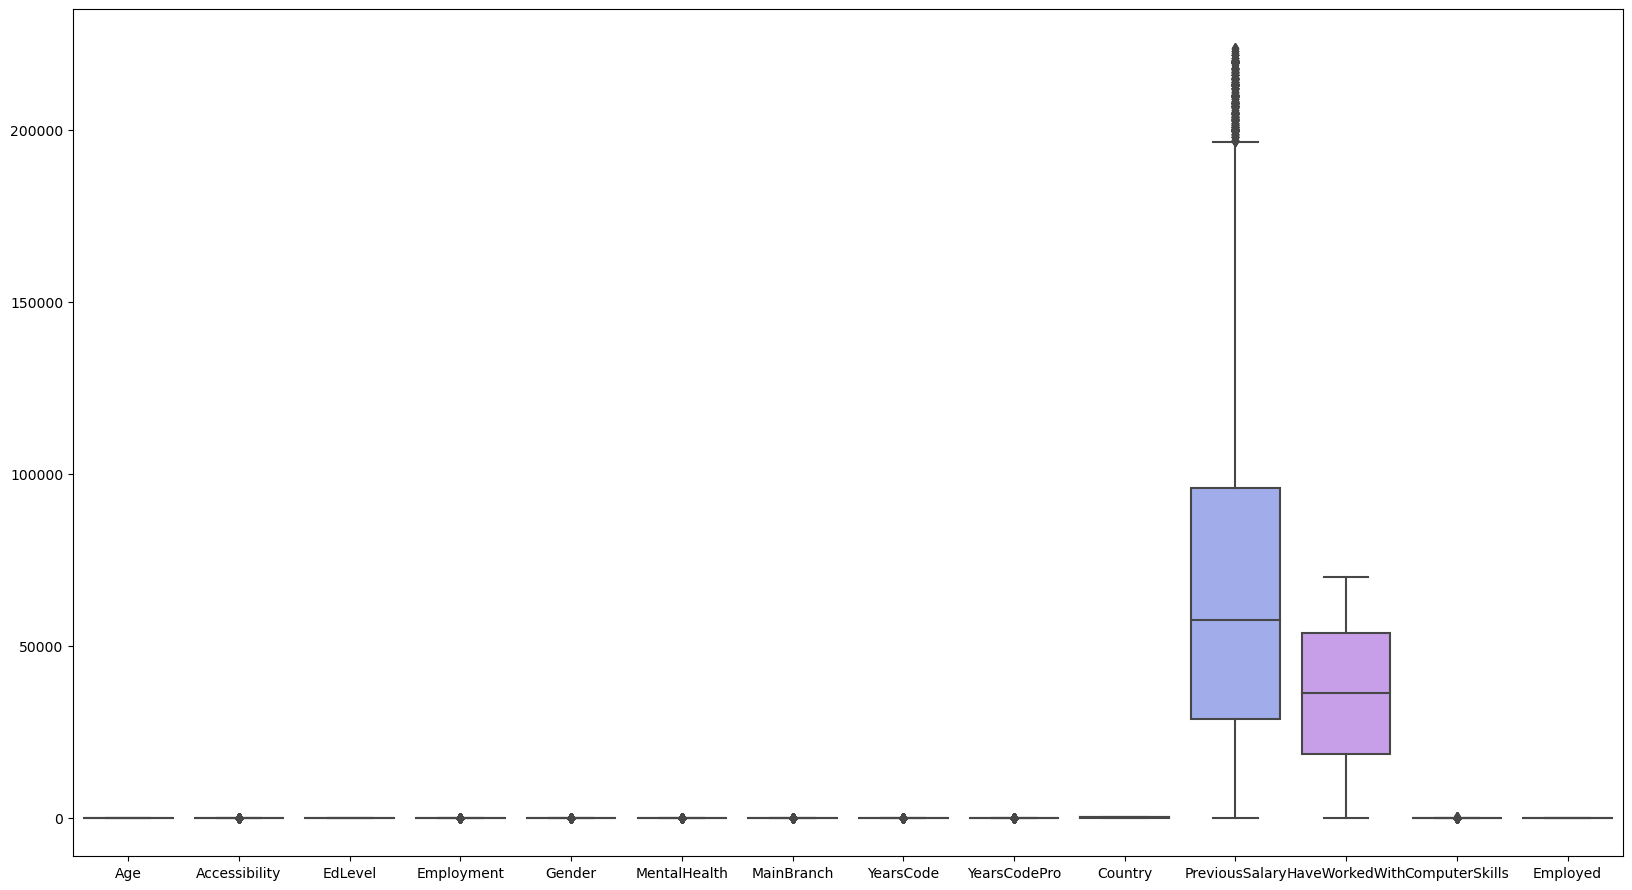

In [114]:
fig=plt.figure(figsize=(20,11))
sns.boxplot(data=proj1)

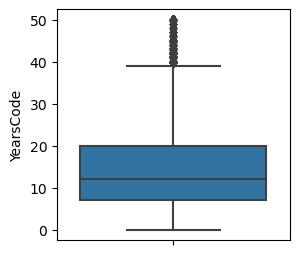

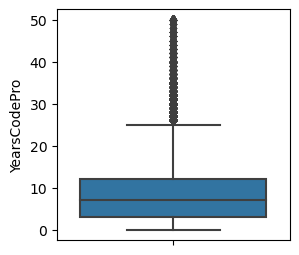

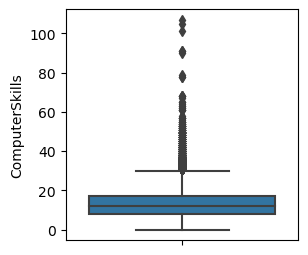

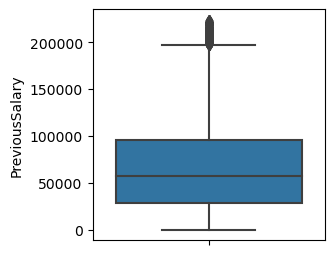

In [115]:
features=["YearsCode","YearsCodePro","ComputerSkills","PreviousSalary"]
for column in proj1[features]:
        plt.figure(figsize=(3,3))
        sns.boxplot(data = proj1, y = column)

In [116]:
                                   #YEARCODE#

<Axes: ylabel='YearsCode'>

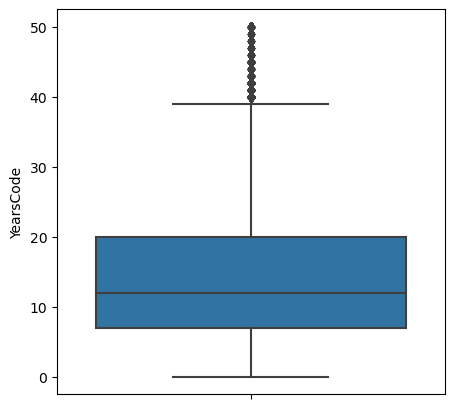

In [117]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=proj1,y="YearsCode")

<Axes: xlabel='YearsCode', ylabel='Density'>

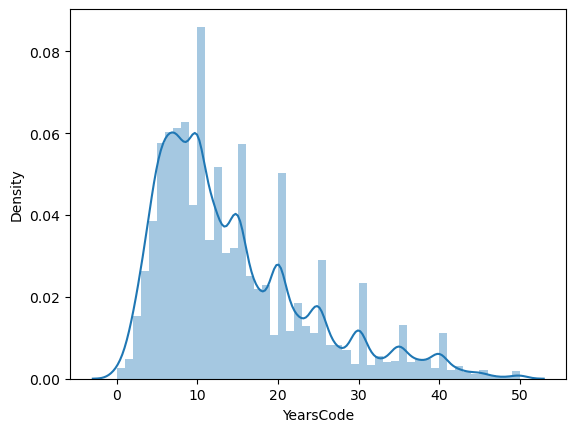

In [118]:
sns.distplot(proj1.YearsCode)

<Axes: >

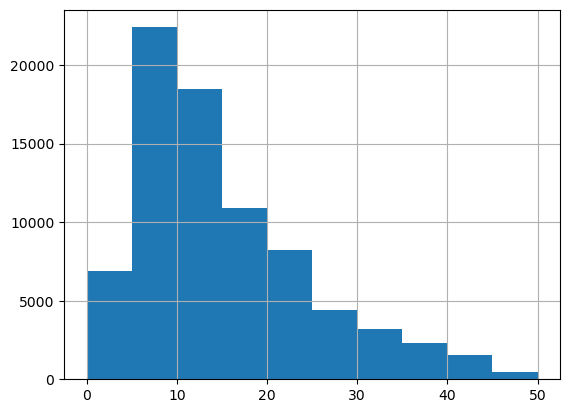

In [119]:
proj1.YearsCode.hist()

In [120]:
IQR1=proj1.YearsCode.quantile(0.75)-proj1.YearsCode.quantile(0.25)
IQR1

13.0

In [121]:
ub1=proj1.YearsCode.quantile(0.75)+3*IQR1
ub1

59.0

In [122]:
proj1.loc[proj1["YearsCode"]>ub1,"YearsCode"]=ub1

<Axes: xlabel='YearsCode', ylabel='Density'>

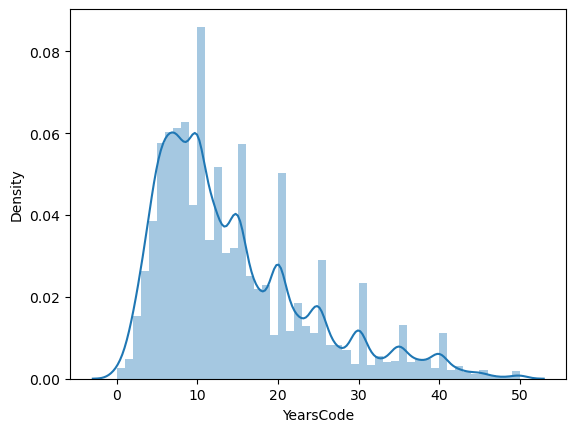

In [123]:
sns.distplot(proj1.YearsCode) 

<Axes: >

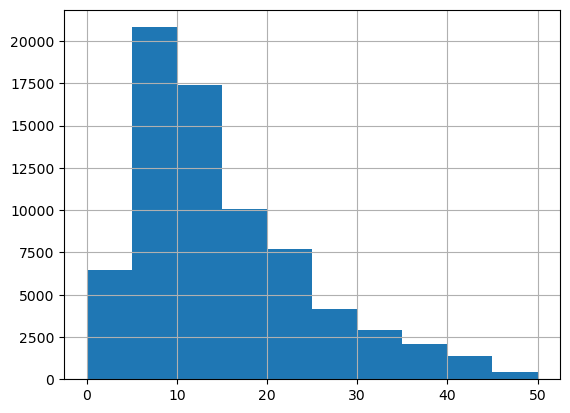

In [124]:
proj.YearsCode.hist()

In [125]:
                              #YearsCodePro#

<Axes: ylabel='YearsCodePro'>

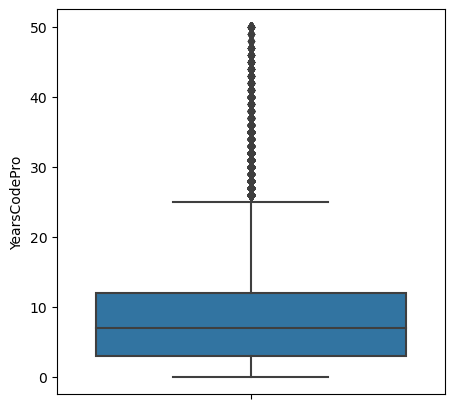

In [126]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=proj1,y="YearsCodePro")

<Axes: xlabel='YearsCodePro', ylabel='Density'>

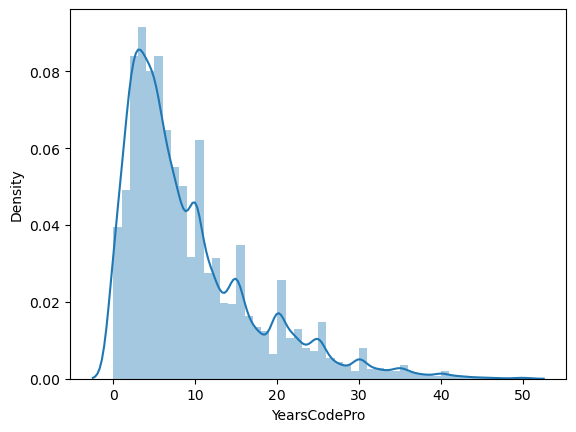

In [127]:
sns.distplot(proj1.YearsCodePro) 

<Axes: >

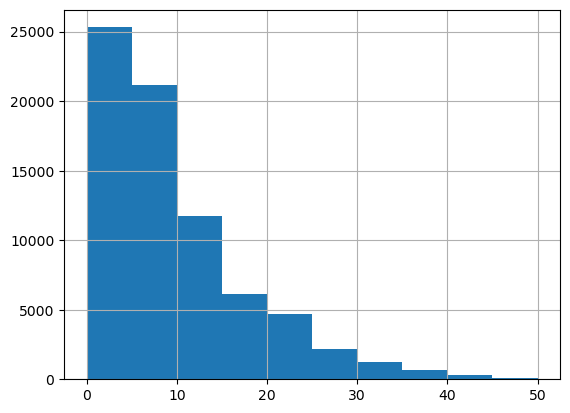

In [128]:
proj.YearsCodePro.hist()

In [129]:
IQR2=proj1.YearsCodePro.quantile(0.75)-proj1.YearsCodePro.quantile(0.25)
IQR2

9.0

In [130]:
ub2=proj1.YearsCodePro.quantile(0.75)+3*IQR2
ub2

39.0

In [131]:
proj1.loc[proj1['YearsCodePro']>ub2,'YearsCodePro']=ub2

<Axes: xlabel='YearsCodePro', ylabel='Density'>

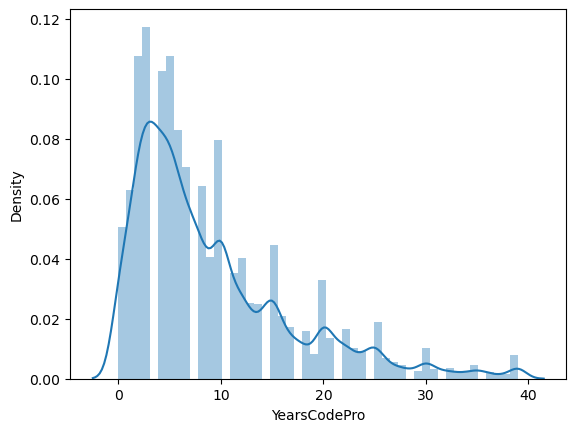

In [132]:
sns.distplot(proj1.YearsCodePro) 

<Axes: >

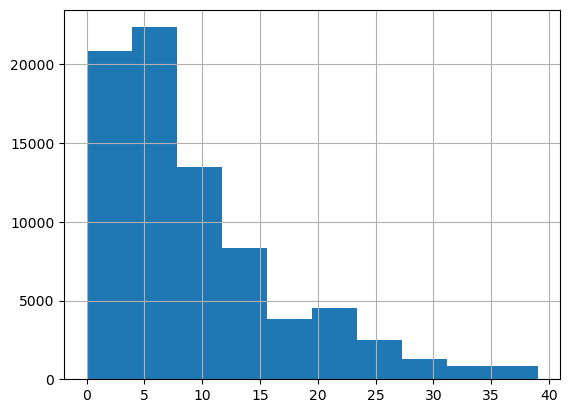

In [133]:
proj1.YearsCodePro.hist()

In [134]:
                      #ComputerSkills#

<Axes: ylabel='ComputerSkills'>

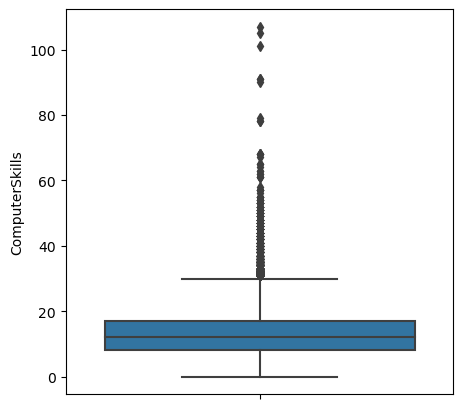

In [135]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=proj1,y="ComputerSkills")

<Axes: xlabel='ComputerSkills', ylabel='Density'>

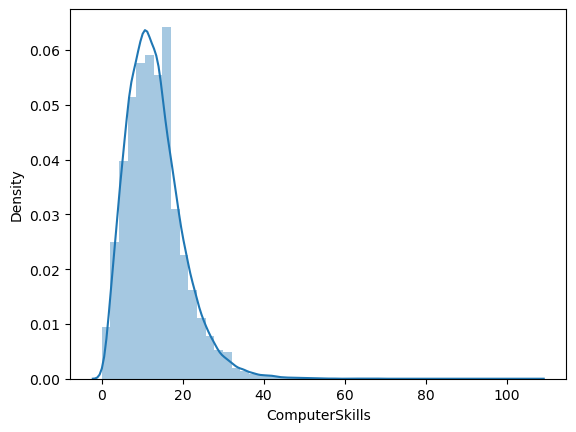

In [136]:
sns.distplot(proj1.ComputerSkills)

<Axes: >

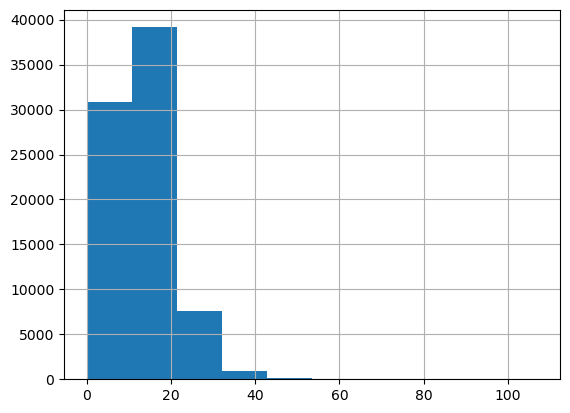

In [137]:
proj1.ComputerSkills.hist()

In [138]:
IQR3=proj1.ComputerSkills.quantile(0.75)-proj1.ComputerSkills.quantile(0.25)
IQR3

9.0

In [139]:
ub3=proj1.ComputerSkills.quantile(0.75)+3*IQR3
ub3

44.0

In [140]:
proj1.loc[proj1['ComputerSkills']>ub3,'ComputerSkills']=ub3

<Axes: xlabel='ComputerSkills', ylabel='Density'>

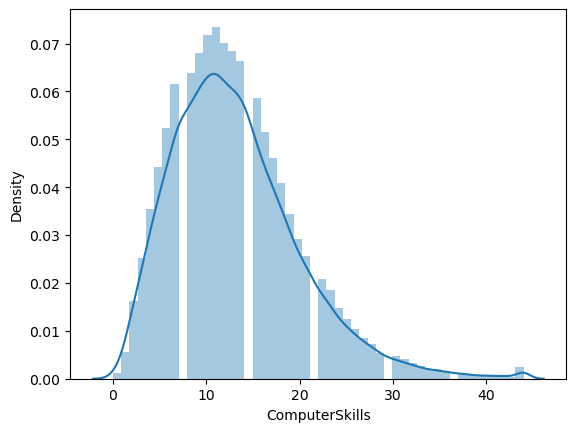

In [141]:
sns.distplot(proj1.ComputerSkills)

<Axes: >

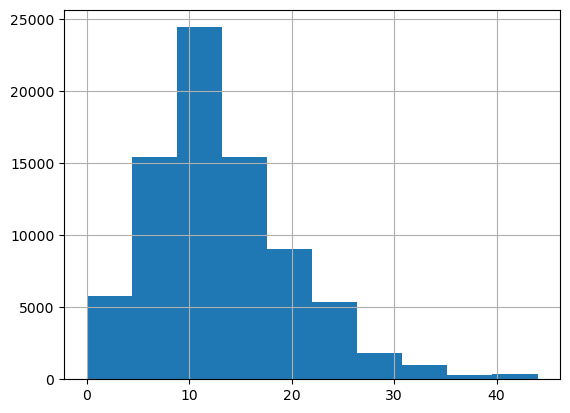

In [142]:
proj1.ComputerSkills.hist()

In [143]:
                    #PreviousSalary#   

<Axes: ylabel='PreviousSalary'>

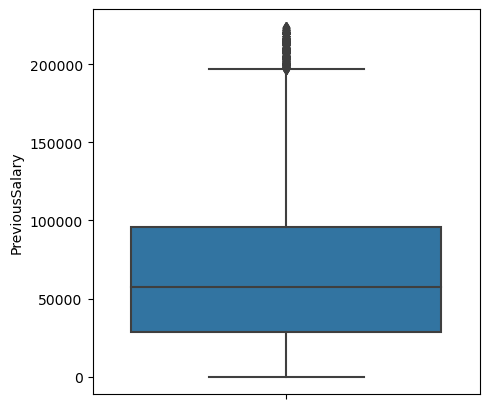

In [144]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=proj1,y="PreviousSalary")

<Axes: xlabel='PreviousSalary', ylabel='Density'>

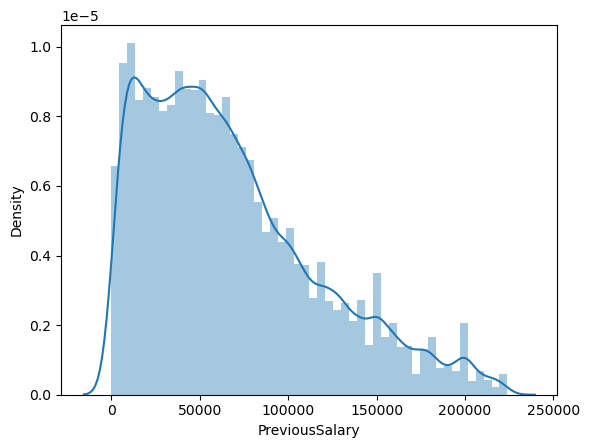

In [145]:
sns.distplot(proj1.PreviousSalary)

<Axes: >

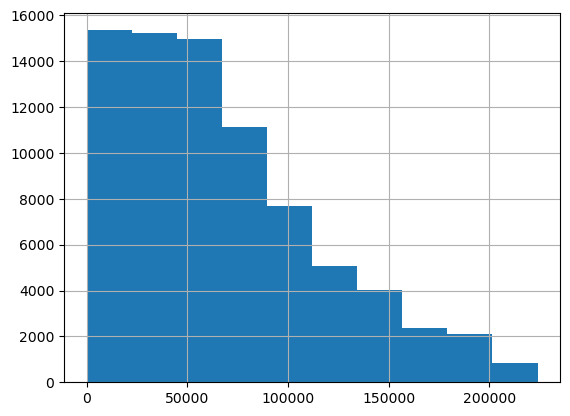

In [146]:
proj1.PreviousSalary.hist()

In [147]:
ub4=proj1["PreviousSalary"].mean()+3*proj1["PreviousSalary"].std()
print(ub4)

216109.37381695228


In [148]:
proj1.loc[proj1['PreviousSalary']>ub4,'PreviousSalary']=ub4

<Axes: xlabel='PreviousSalary', ylabel='Density'>

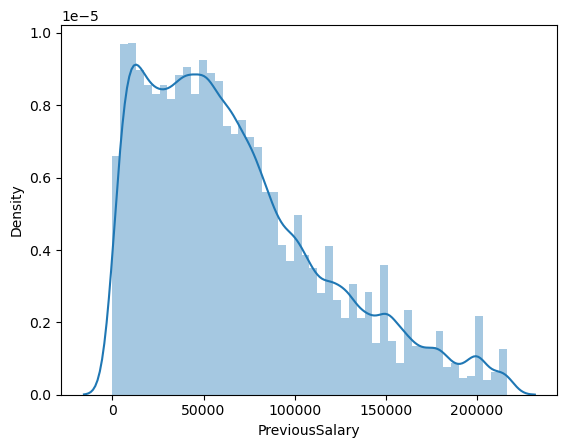

In [149]:
sns.distplot(proj1.PreviousSalary)

<Axes: >

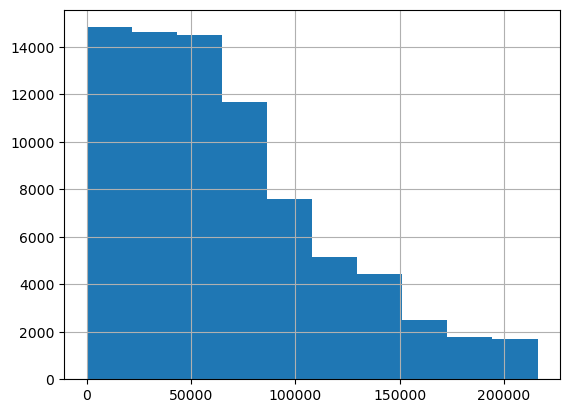

In [150]:
proj1.PreviousSalary.hist()

# Skewness Treatment

In [151]:
proj1.skew()

Age               0.622523
Accessibility     5.613363
EdLevel          -0.472966
Employment       -2.407853
Gender            3.780996
MentalHealth      1.320219
MainBranch        2.985517
YearsCode         1.152637
YearsCodePro      1.404309
Country          -0.120085
PreviousSalary    0.875871
HaveWorkedWith   -0.046596
ComputerSkills    0.969179
Employed          0.000000
dtype: float64

<Axes: xlabel='YearsCode', ylabel='Density'>

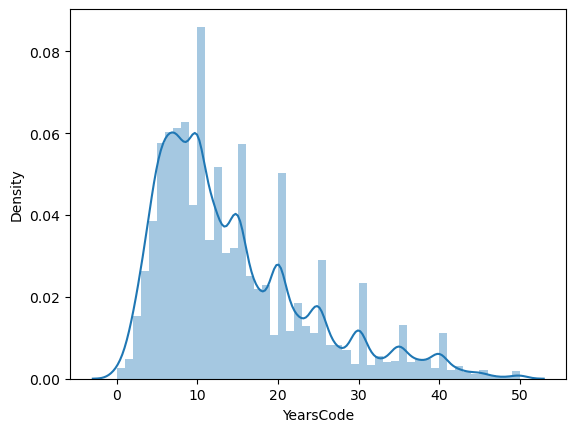

In [152]:
sns.distplot(proj1.YearsCode)

In [153]:
proj1['YearsCode']=np.sqrt(proj1['YearsCode'])

In [154]:
proj1.YearsCode.skew()

0.4301260146873013

<Axes: xlabel='YearsCode', ylabel='Density'>

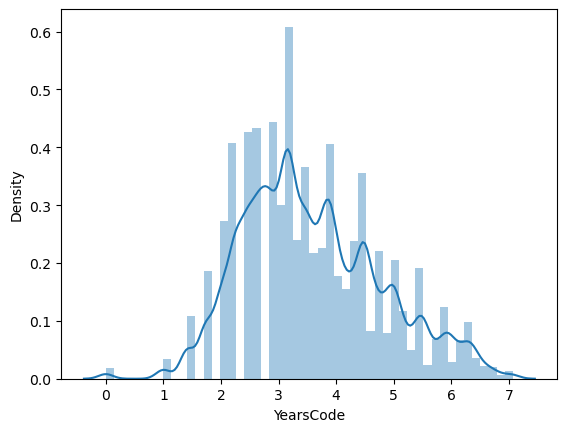

In [155]:
sns.distplot(proj1.YearsCode)

In [156]:
                                      #YEARSCODEPRO#

<Axes: xlabel='YearsCodePro', ylabel='Density'>

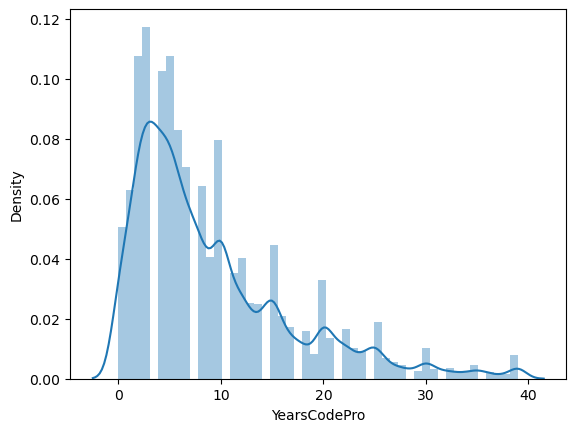

In [157]:
sns.distplot(proj1.YearsCodePro)

In [158]:
proj1['YearsCodePro']=np.sqrt(proj1['YearsCodePro'])

In [159]:
proj1.YearsCodePro.skew()

0.3144843270299446

<Axes: xlabel='YearsCodePro', ylabel='Density'>

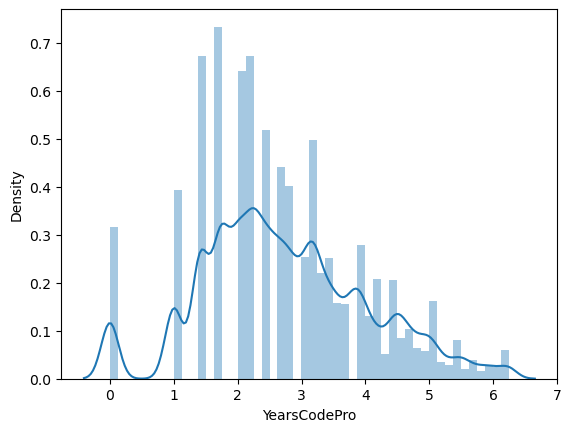

In [160]:
sns.distplot(proj1.YearsCodePro)

In [161]:
proj1.skew()

Age               0.622523
Accessibility     5.613363
EdLevel          -0.472966
Employment       -2.407853
Gender            3.780996
MentalHealth      1.320219
MainBranch        2.985517
YearsCode         0.430126
YearsCodePro      0.314484
Country          -0.120085
PreviousSalary    0.875871
HaveWorkedWith   -0.046596
ComputerSkills    0.969179
Employed          0.000000
dtype: float64

# Visualization

In [162]:
c1=proj1.corr()

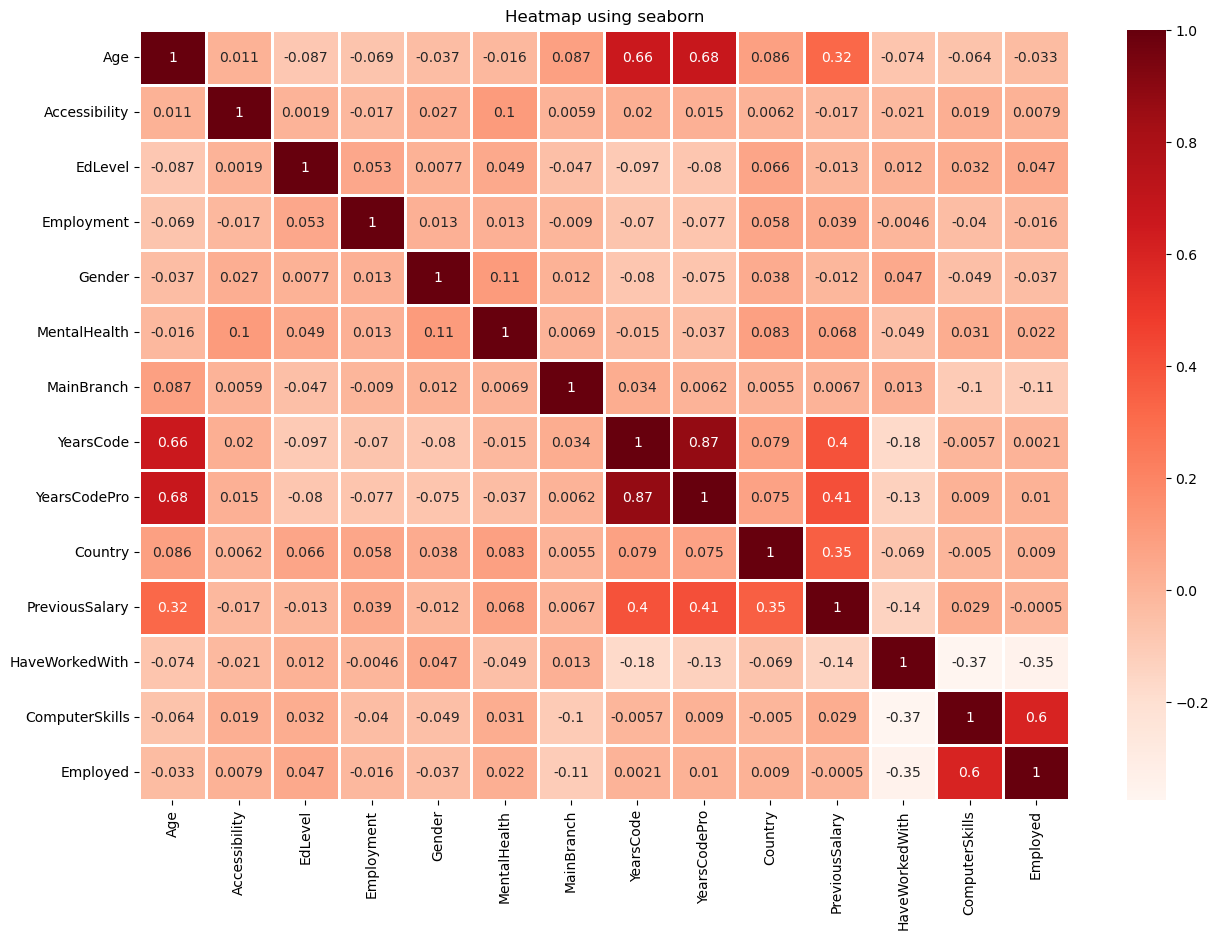

In [163]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(c1,linewidth=1,annot=True,cmap=plt.cm.Reds)
plt.title("Heatmap using seaborn")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

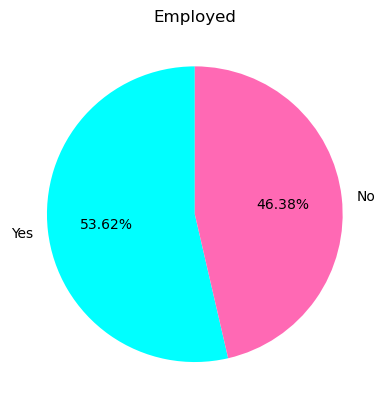

In [301]:
pi=[proj[proj['Employed']==1].shape[0],proj[proj['Employed']==0].shape[0]]
label=['Yes', 'No']
col=['cyan','hotpink']
plt.pie(pi,labels=label,colors=col,autopct='%1.2f%%',startangle=90)
plt.title('Employed')
plt.show

# Logistic

In [165]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [166]:
lg_p2=lg.predict(x_te)
lg_p2

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [167]:
lg_c2=confusion_matrix(y_te,lg_p2)
lg_c2

array([[5959, 1858],
       [1703, 6237]], dtype=int64)

In [168]:
lg_ac2=lg_c2.diagonal().sum()/lg_c2.sum()*100
lg_ac2

77.40052040363014

In [169]:
print(classification_report(y_te,lg_p2))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      7817
           1       0.77      0.79      0.78      7940

    accuracy                           0.77     15757
   macro avg       0.77      0.77      0.77     15757
weighted avg       0.77      0.77      0.77     15757



In [170]:
lg_f2=f1_score(y_te,lg_p2)
lg_pr2=precision_score(y_te,lg_p2)
lg_r2=recall_score(y_te,lg_p2)
print(lg_f2,lg_pr2,lg_r2)

0.7779232927970064 0.7704756022235948 0.7855163727959698


# DT

In [171]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [172]:
dt1.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [173]:
dt1_p2=dt1.predict(x_te)
dt1_p2

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [174]:
dt1_c2=confusion_matrix(y_te,dt1_p2)
dt1_c2

array([[7022,  795],
       [1357, 6583]], dtype=int64)

In [175]:
dt1_ac2=dt1_c2.diagonal().sum()/dt1_c2.sum()*100
dt1_ac2

86.34257790188488

In [176]:
print(classification_report(y_te,dt1_p2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7817
           1       0.89      0.83      0.86      7940

    accuracy                           0.86     15757
   macro avg       0.87      0.86      0.86     15757
weighted avg       0.87      0.86      0.86     15757



In [177]:
dt1_f2=f1_score(y_te,dt1_p2)
dt1_pr2=precision_score(y_te,dt1_p2)
dt1_r2=recall_score(y_te,dt1_p2)
print(dt1_f2,dt1_pr2,dt1_r2)

0.859511685598642 0.8922472214692329 0.8290931989924433


# Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()

In [179]:
rf1.fit(x_tr,y_tr)

RandomForestClassifier()

In [180]:
rf1_p2=rf1.predict(x_te)

In [181]:
rf1_c2=confusion_matrix(y_te,rf1_p2)
rf1_c2

array([[7148,  669],
       [1144, 6796]], dtype=int64)

In [182]:
rf1_ac2=rf1_c2.diagonal().sum()/rf1_c2.sum()*100
rf1_ac2

88.49400266548201

In [183]:
print(classification_report(y_te,rf1_p2))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7817
           1       0.91      0.86      0.88      7940

    accuracy                           0.88     15757
   macro avg       0.89      0.89      0.88     15757
weighted avg       0.89      0.88      0.88     15757



In [184]:
rf1_f2=f1_score(y_te,rf1_p2)
rf1_pr2=precision_score(y_te,rf1_p2)
rf1_r2=recall_score(y_te,rf1_p2)
print(rf1_f2,rf1_pr2,rf1_r2)

0.8823109380071406 0.9103817816476892 0.8559193954659949


# KNN

In [185]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier()

In [186]:
knn_p2=knn.predict(x_te)

In [187]:
knn_c2=confusion_matrix(y_te,knn_p2)
knn_c2

array([[5919, 1898],
       [2587, 5353]], dtype=int64)

In [188]:
knn_ac2=knn_c2.diagonal().sum()/knn_c2.sum()*100
knn_ac2

71.53645998603795

In [189]:
print(classification_report(y_te,knn_p2))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      7817
           1       0.74      0.67      0.70      7940

    accuracy                           0.72     15757
   macro avg       0.72      0.72      0.71     15757
weighted avg       0.72      0.72      0.71     15757



In [190]:
knn_f2=f1_score(y_te,knn_p2)
knn_pr2=precision_score(y_te,knn_p2)
knn_r2=recall_score(y_te,knn_p2)
print(knn_f2,knn_pr2,knn_r2)

0.7047593970113883 0.7382430009653841 0.6741813602015113


# Naive Bayes

In [191]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [192]:
nb_p2=nb.predict(x_te)

In [193]:
nb_c2=confusion_matrix(y_te,nb_p2)
nb_c2

array([[4869, 2948],
       [3550, 4390]], dtype=int64)

In [194]:
nb_ac2=nb_c2.diagonal().sum()/nb_c2.sum()*100
nb_ac2

58.761185504854986

In [195]:
print(classification_report(y_te,nb_p2))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      7817
           1       0.60      0.55      0.57      7940

    accuracy                           0.59     15757
   macro avg       0.59      0.59      0.59     15757
weighted avg       0.59      0.59      0.59     15757



In [196]:
nb_f2=f1_score(y_te,nb_p2)
nb_pr2=precision_score(y_te,nb_p2)
nb_r2=recall_score(y_te,nb_p2)
print(nb_f2,nb_pr2,nb_r2)

0.574682550071999 0.5982556554919597 0.552896725440806


# XGB

In [197]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [198]:
xgb_p2=xgb.predict(x_te)

In [199]:
xgb_c2=confusion_matrix(y_te,xgb_p2)
xgb_c2

array([[6766, 1051],
       [1176, 6764]], dtype=int64)

In [200]:
xgb_ac2=xgb_c2.diagonal().sum()/xgb_c2.sum()*100
xgb_ac2

85.86659897188551

In [201]:
print(classification_report(y_te,xgb_p2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7817
           1       0.87      0.85      0.86      7940

    accuracy                           0.86     15757
   macro avg       0.86      0.86      0.86     15757
weighted avg       0.86      0.86      0.86     15757



In [202]:
xgb_f2=f1_score(y_te,xgb_p2)
xgb_pr2=precision_score(y_te,xgb_p2)
xgb_r2=recall_score(y_te,xgb_p2)
print(xgb_f2,xgb_pr2,xgb_r2)

0.8586480482386544 0.8655150351887396 0.851889168765743


# SVM

In [203]:
svm.fit(x_tr,y_tr)

SVC()

In [204]:
svm_p2=svm.predict(x_te)

In [205]:
svm_cf2=confusion_matrix(y_te,svm_p2)
svm_cf2

array([[4881, 2936],
       [2248, 5692]], dtype=int64)

In [206]:
svm_ac2=svm_cf2.diagonal().sum()/svm_cf2.sum()*100
svm_ac2

67.10033635844387

In [207]:
print(classification_report(y_te,svm_p2))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      7817
           1       0.66      0.72      0.69      7940

    accuracy                           0.67     15757
   macro avg       0.67      0.67      0.67     15757
weighted avg       0.67      0.67      0.67     15757



In [208]:
svm_f2=f1_score(y_te,svm_p2)
svm_pr2=precision_score(y_te,svm_p2)
svm_r2=recall_score(y_te,svm_p2)
print(svm_f2,svm_pr2,svm_r2)

0.687107677450507 0.6597125637459434 0.7168765743073048


In [209]:
L12=["Logistic","DT","RF","XGB","NB","SVM"]
L22=[lg_ac2,dt1_ac2,rf1_ac2,xgb_ac2,nb_ac2,svm_ac2]
L32=[lg_pr2,dt1_pr2,rf1_pr2,xgb_pr2,nb_pr2,svm_pr2]
L42=[lg_r2,dt1_r2,rf1_r2,xgb_r2,nb_r2,svm_r2]
L52=[lg_f2,dt1_f2,rf1_f2,xgb_f2,nb_f2,svm_f2]

In [210]:
df2=pd.DataFrame({"Model":L12,"Accuracy":L22,"Precision":L32,"Recall":L42,"f1_score":L52})
df2

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,77.400520,0.770476,0.785516,0.777923
1,DT,86.342578,0.892247,0.829093,0.859512
2,RF,88.494003,0.910382,0.855919,0.882311
3,XGB,85.866599,0.865515,0.851889,0.858648
4,NB,58.761186,0.598256,0.552897,0.574683
5,SVM,67.100336,0.659713,0.716877,0.687108


In [211]:
#CONCLUSION:
   #Undersampling-random-XGB:Highest Accuracy with High TN
                #-Imblearn-XGB:Highest Accuracy with High TN
                #-Nearmiss-XGB:Highest Accuracy with High TN
    #Oversampling-Random-RF:Highest Accuracy with Low TN
                #-Imblearn-XGB:Highest Accuracy with High TN
                #-Smote-XGB:Highest accuracy with High TN

# Feature Selection

In [212]:
#dt1.feature_importances_

In [213]:
#d_1=pd.DataFrame(dt1.feature_importances_)
#d_1

In [214]:
#d1=pd.DataFrame({"Feature_Score":list(dt1.feature_importances_),"columns":list(proj1.iloc[:,:-1].columns)})
#d1

In [215]:
#d2=proj1.drop(['Age','Accessibility','Employment','Gender','MainBranch'],axis=1)
#d2.head(1)

In [216]:
#d1_x=d2.iloc[:,:-1]
#d1_y=d2.iloc[:,-1]

In [217]:
#d1_x.head(1)

In [218]:
#x_tr1,x_te1,y_tr1,y_te1=train_test_split(d1_x,d1_y,test_size=0.2,random_state=100)
#x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

# Random Forest Classifier

In [219]:
#rf1.feature_importances_

In [220]:
#rc=pd.DataFrame(rf1.feature_importances_)
#rc

In [221]:
#r1=pd.DataFrame({"Feature_Score":list(rf1.feature_importances_),"columns":list(proj1.iloc[:,:-1].columns)})
#r1

In [222]:
#r2=proj1.drop(['Age','Accessibility','Employment','Gender','MainBranch'],axis=1)
#r2.head(1)

In [223]:
#r1_x=r2.iloc[:,:-1]
#r1_y=r2.iloc[:,-1]

In [224]:
#r1_x.head(1)

In [225]:
#x_tr1,x_te1,y_tr1,y_te1=train_test_split(r1_x,r1_y,test_size=0.2,random_state=101)
#x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

# Recurssive Feature Elimination

In [226]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [227]:
rfe=RFE(dtree,n_features_to_select=10)   

In [228]:
rfe.fit(proj1.iloc[:,:-1],proj1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [229]:
rfe.support_

array([ True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True])

In [230]:
f1=pd.DataFrame({"feature":list(rfe.support_),"col":list(proj1.iloc[:,:-1].columns)})
f1

,feature,col
0,True,Age
1,False,Accessibility
2,True,EdLevel
3,True,Employment
4,False,Gender
5,True,MentalHealth
6,False,MainBranch
7,True,YearsCode
8,True,YearsCodePro
9,True,Country


In [231]:
f2=proj1.drop(['Accessibility','Gender','MainBranch'],axis=1)
f2.head(1)

,Age,EdLevel,Employment,MentalHealth,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
42778,1,0,1,0,4.242641,3.872983,160,40608.0,37773,2,0


In [232]:
f1_x=f2.iloc[:,:-1]
f1_y=f2.iloc[:,-1]

In [233]:
f1_x.head(1)

,Age,EdLevel,Employment,MentalHealth,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills
42778,1,0,1,0,4.242641,3.872983,160,40608.0,37773,2


In [234]:
x_tr1,x_te1,y_tr1,y_te1=train_test_split(f1_x,f1_y,test_size=0.2,random_state=101)
x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

((63027, 10), (15757, 10), (63027,), (15757,))

# Logistic

In [235]:
lg.fit(x_tr1,y_tr1)

LogisticRegression()

In [236]:
lg_p3=lg.predict(x_te1)
lg_p3

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [237]:
lg_c3=confusion_matrix(y_te1,lg_p3)
lg_c3 

array([[5860, 1957],
       [1687, 6253]], dtype=int64)

In [238]:
lg_ac3=lg_c3.diagonal().sum()/lg_c3.sum()*100
lg_ac3

76.87377038776417

In [239]:
print(classification_report(y_te1,lg_p3))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      7817
           1       0.76      0.79      0.77      7940

    accuracy                           0.77     15757
   macro avg       0.77      0.77      0.77     15757
weighted avg       0.77      0.77      0.77     15757



In [240]:
lg_f3=f1_score(y_te1,lg_p3)
lg_pr3=precision_score(y_te1,lg_p3)
lg_r3=recall_score(y_te1,lg_p3)
print(lg_f3,lg_pr3,lg_r3)

0.7743653250773995 0.7616321559074299 0.7875314861460957


# DT

In [241]:
dt.fit(x_tr1,y_tr1)

DecisionTreeClassifier()

In [242]:
dt_p3=dt.predict(x_te1)
dt_p3

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [243]:
dt_c3=confusion_matrix(y_te1,dt_p3)
dt_c3

array([[7038,  779],
       [1323, 6617]], dtype=int64)

In [244]:
dt_ac3=dt_c3.diagonal().sum()/dt_c3.sum()*100
dt_ac3

86.65989718855111

In [245]:
print(classification_report(y_te1,dt_p3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7817
           1       0.89      0.83      0.86      7940

    accuracy                           0.87     15757
   macro avg       0.87      0.87      0.87     15757
weighted avg       0.87      0.87      0.87     15757



In [246]:
dt_f3=f1_score(y_te1,dt_p3)
dt_pr3=precision_score(y_te1,dt_p3)
dt_r3=recall_score(y_te1,dt_p3)
print(dt_f3,dt_pr3,dt_r3)

0.8629368805425144 0.8946727961060033 0.833375314861461


# RF

In [247]:
rf.fit(x_tr1,y_tr1)

RandomForestClassifier()

In [248]:
rf_p3=rf.predict(x_te1)
rf_p3

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [249]:
rf_c3=confusion_matrix(y_te1,rf_p3)
rf_c3 

array([[7142,  675],
       [1130, 6810]], dtype=int64)

In [250]:
rf_ac3=rf_c3.diagonal().sum()/rf_c3.sum()*100
rf_ac3

88.5447737513486

In [251]:
print(classification_report(y_te1,rf_p3))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7817
           1       0.91      0.86      0.88      7940

    accuracy                           0.89     15757
   macro avg       0.89      0.89      0.89     15757
weighted avg       0.89      0.89      0.89     15757



In [252]:
rf_f3=f1_score(y_te1,rf_p3)
rf_pr3=precision_score(y_te1,rf_p3)
rf_r3=recall_score(y_te1,rf_p3)
print(rf_f3,rf_pr3,rf_r3)

0.8829821717990277 0.9098196392785571 0.8576826196473551


# KNN

In [253]:
knn.fit(x_tr1,y_tr1)

KNeighborsClassifier()

In [254]:
knn_p3=knn.predict(x_te1)
knn_p3

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [255]:
knn_c3=confusion_matrix(y_te1,knn_p3)
knn_c3 

array([[5916, 1901],
       [2589, 5351]], dtype=int64)

In [256]:
knn_ac3=knn_c3.diagonal().sum()/knn_c3.sum()*100
knn_ac3

71.50472805737132

In [257]:
print(classification_report(y_te1,knn_p3))

              precision    recall  f1-score   support

           0       0.70      0.76      0.72      7817
           1       0.74      0.67      0.70      7940

    accuracy                           0.72     15757
   macro avg       0.72      0.72      0.71     15757
weighted avg       0.72      0.72      0.71     15757



In [258]:
knn_f3=f1_score(y_te1,knn_p3)
knn_pr3=precision_score(y_te1,knn_p3)
knn_r3=recall_score(y_te1,knn_p3)
print(knn_f3,knn_pr3,knn_r3)

0.7044497103738809 0.737865416436845 0.6739294710327456


# NB

In [259]:
nb.fit(x_tr1,y_tr1)

MultinomialNB()

In [260]:
nb_p3=nb.predict(x_te1)
nb_p3

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [261]:
nb_c3=confusion_matrix(y_te1,nb_p3)
nb_c3 

array([[4867, 2950],
       [3549, 4391]], dtype=int64)

In [262]:
nb_ac3=nb_c3.diagonal().sum()/nb_c3.sum()*100
nb_ac3

58.75483911912166

In [263]:
print(classification_report(y_te1,nb_p3))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      7817
           1       0.60      0.55      0.57      7940

    accuracy                           0.59     15757
   macro avg       0.59      0.59      0.59     15757
weighted avg       0.59      0.59      0.59     15757



In [264]:
nb_f3=f1_score(y_te1,nb_p3)
nb_pr3=precision_score(y_te1,nb_p3)
nb_r3=recall_score(y_te1,nb_p3)
print(nb_f3,nb_pr3,nb_r3)

0.5747006085989136 0.5981473913635744 0.5530226700251889


# XGB

In [265]:
xgb.fit(x_tr1,y_tr1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [266]:
xgb_p3=knn.predict(x_te1)
xgb_p3

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [267]:
xgb_c3=confusion_matrix(y_te1,xgb_p3)
xgb_c3 

array([[5916, 1901],
       [2589, 5351]], dtype=int64)

In [268]:
xgb_ac3=xgb_c3.diagonal().sum()/xgb_c3.sum()*100
xgb_ac3

71.50472805737132

In [269]:
print(classification_report(y_te1,xgb_p3))

              precision    recall  f1-score   support

           0       0.70      0.76      0.72      7817
           1       0.74      0.67      0.70      7940

    accuracy                           0.72     15757
   macro avg       0.72      0.72      0.71     15757
weighted avg       0.72      0.72      0.71     15757



In [270]:
xgb_f3=f1_score(y_te1,xgb_p3)
xgb_pr3=precision_score(y_te1,xgb_p3)
xgb_r3=recall_score(y_te1,xgb_p3)
print(xgb_f3,xgb_pr3,xgb_r3)

0.7044497103738809 0.737865416436845 0.6739294710327456


# SVM

In [271]:
svm.fit(x_tr1,y_tr1)

SVC()

In [272]:
svm_p3=svm.predict(x_te1)

In [273]:
svm_cf3=confusion_matrix(y_te1,svm_p3)
svm_cf3

array([[4880, 2937],
       [2249, 5691]], dtype=int64)

In [274]:
svm_ac3=svm_cf3.diagonal().sum()/svm_cf3.sum()*100
svm_ac3

67.08764358697722

In [275]:
print(classification_report(y_te1,svm_p3))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      7817
           1       0.66      0.72      0.69      7940

    accuracy                           0.67     15757
   macro avg       0.67      0.67      0.67     15757
weighted avg       0.67      0.67      0.67     15757



In [276]:
svm_f3=f1_score(y_te1,svm_p3)
svm_pr3=precision_score(y_te1,svm_p3)
svm_r3=recall_score(y_te1,svm_p3)
print(svm_f3,svm_pr3,svm_r3)

0.6869869628198938 0.6595966620305981 0.7167506297229219


In [277]:
L13=["Logistic","DT","RF","XGB","NB","SVM"]
L23=[lg_ac3,dt_ac3,rf_ac3,xgb_ac3,nb_ac3,svm_ac3]
L33=[lg_pr3,dt_pr3,rf_pr3,xgb_pr3,nb_pr3,svm_pr3]
L43=[lg_r3,dt_r3,rf_r3,xgb_r3,nb_r3,svm_r3]
L53=[lg_f3,dt_f3,rf_f3,xgb_f3,nb_f3,svm_f3]

In [278]:
df3=pd.DataFrame({"Model":L13,"Accuracy":L23,"Precision":L33,"Recall":L43,"f1_score":L53})
df3

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,76.873770,0.761632,0.787531,0.774365
1,DT,86.659897,0.894673,0.833375,0.862937
2,RF,88.544774,0.909820,0.857683,0.882982
3,XGB,71.504728,0.737865,0.673929,0.704450
4,NB,58.754839,0.598147,0.553023,0.574701
5,SVM,67.087644,0.659597,0.716751,0.686987


In [279]:
#RF:High accuracy with low TN on doing Feature Selection using Decision tree classification
#TN Low: Used AUC ROC Curve

In [280]:
#AUC-ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [281]:
roc=roc_auc_score(rf_p3,y_te1)
roc

0.886607111708911

In [282]:
prob=rf.predict_proba(x_te1)
#prob

In [283]:
d_fr=pd.DataFrame(prob)
#d_fr

In [284]:
fpr,tpr,threshold=roc_curve(y_te1,d_fr.iloc[:,1])
#fpr,tpr,threshold        

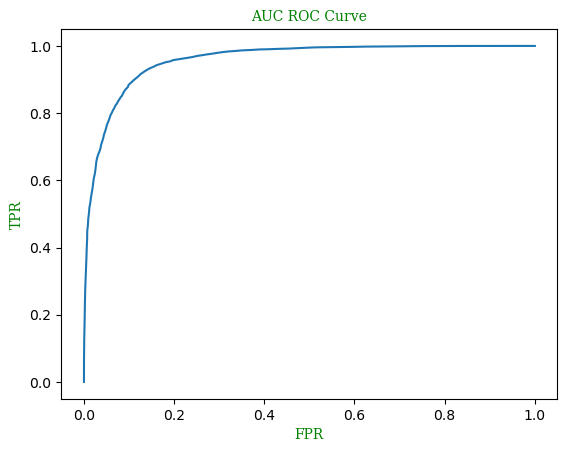

In [285]:
plt.plot(fpr,tpr)
font1={"family":"serif", "color":"green","size":10}
plt.title("AUC ROC Curve",fontdict=font1)
plt.xlabel("FPR",fontdict=font1)
plt.ylabel("TPR",fontdict=font1)
plt.show()